In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
stds = MinMaxScaler(feature_range=(0,1))
from sklearn.svm import SVR

In [2]:
data = pd.read_csv('TCS.NS.csv')
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-03-02,381.000000,384.500000,377.500000,381.600006,283.754730,4053352.0
1,2010-03-03,384.500000,387.000000,382.075012,384.375000,285.818115,2754742.0
2,2010-03-04,384.000000,385.000000,378.500000,381.950012,284.014954,2053606.0
3,2010-03-05,382.500000,383.475006,380.075012,381.299988,283.531555,1287312.0
4,2010-03-08,383.799988,385.000000,380.149994,381.350006,283.568909,3015740.0


In [3]:
data.isnull().sum()

Date         0
Open         7
High         7
Low          7
Close        7
Adj Close    7
Volume       7
dtype: int64

In [4]:
data = data.dropna()

In [5]:
data.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [6]:
data = data.drop(['Date'],axis=1)

In [7]:
large_val = ['Open','High','Low','Adj Close','Volume']
data[large_val] = stds.fit_transform(data[large_val])

In [8]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
0,0.010839,0.010878,0.014122,381.600006,0.009252,0.046026
1,0.012244,0.011867,0.015974,384.375000,0.010058,0.031280
2,0.012043,0.011076,0.014527,381.950012,0.009353,0.023319
3,0.011441,0.010473,0.015165,381.299988,0.009164,0.014617
4,0.011963,0.011076,0.015195,381.350006,0.009179,0.034244


In [9]:
close = data.pop('Close')
data = data
data.head()

,Open,High,Low,Adj Close,Volume
0,0.010839,0.010878,0.014122,0.009252,0.046026
1,0.012244,0.011867,0.015974,0.010058,0.031280
2,0.012043,0.011076,0.014527,0.009353,0.023319
3,0.011441,0.010473,0.015165,0.009164,0.014617
4,0.011963,0.011076,0.015195,0.009179,0.034244


In [10]:
x_train,x_test,y_train,y_test = train_test_split(data,close,test_size = 0.2)

In [11]:
model = RandomForestRegressor(max_depth=50, random_state=0,n_estimators=100)
#model =  SVR(C=1000, kernel ='rbf')

In [12]:
model.fit(x_train,y_train)
import math
from sklearn.metrics import mean_squared_error

In [26]:
pred = model.predict(x_test)

print(pred)


[1998.85900368 2235.33650147 2084.42999143 1525.79448131 1471.67573477
  594.00575132 1053.89381106 1064.51350336 2198.44154067 1290.62639155
  420.98699742 1313.57798935 2068.91798334 1743.28172114 1913.04700921
  380.0962497  1259.1511011  1861.80901618 1247.42479734 1863.47149667
  591.10199892 1269.99609132 1302.05821904 1080.32089703  611.54399784
  632.36825792 1034.90042293 2255.41850343  612.69075792  541.05400444
 1293.3452173  1228.32849614  485.39699922 2192.77100588 1517.73341446
 2267.84350343  615.47924748 2248.24803234 1318.51081301 2076.2115039
  540.77600156 1116.27472419 1237.48130734  427.22699892 2714.04798579
  638.13075492 1265.0026794   551.31774784 1352.93827776  725.67949232
  541.12049808 1196.47399186  581.612494   1297.05910656 1899.90550774
  788.80949832 1200.91999515 2150.88851323  560.07900744 1330.53240715
  647.42224676 2170.19903332  658.96575372  513.58050198 1099.6210964
 1271.47509158 1210.46731066 1176.16470582 1885.35200329 1046.9464966
 1034.723

In [27]:
test_again = pd.read_csv('test.csv')

In [28]:
pt = np.sqrt(np.mean((pred - y_test)**2))
pred2 = model.predict(test_again)
print(pt)
print(pred2)

9.681692259550646
[2821.56698236]


In [29]:
import matplotlib.pyplot as plt

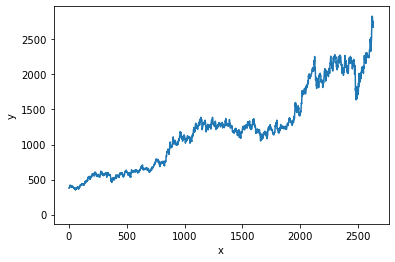

In [30]:
plt.figure()
plt.plot(close)
plt.plot(pt)
plt.xlabel("x")
plt.ylabel('y')
plt.show()